<a href="https://colab.research.google.com/github/mentorbruh/digit-recognizer/blob/main/Copy_of_Digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.preprocessing.image  import ImageDataGenerator

# Import dataset

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# CNN 

In [ ]:
X_train[0].shape

(28, 28, 1)

### Convolution layer:

In [ ]:
cnn = tf.keras.models.Sequential()  

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, 
                               kernel_size= 3, 
                               activation = 'relu', input_shape= [28,28,1]))   ## Convolution layer

### Pooling:

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Flattening:

In [ ]:
cnn.add(tf.keras.layers.Flatten()) ## Flattening

In [ ]:
cnn.output_shape

(None, 5408)

### Hidden layer:

In [ ]:
cnn.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))  ## add fully connected layer

In [ ]:
cnn.output_shape

(None, 50)

### Output layer:

In [ ]:
cnn.add(tf.keras.layers.Dense(units = 10, activation = 'softmax')) ## output layer 

In [ ]:
cnn.output_shape

(None, 10)

In [ ]:
cnn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
print(cnn.input_shape)
print(X_test.shape)
print(Y_test.shape)

(None, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
cnn.fit(X_train,Y_train,validation_data= (X_test,Y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1876 - accuracy: 0.9446 - val_loss: 0.0698 - val_accuracy: 0.9764
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0654 - accuracy: 0.9807 - val_loss: 0.0578 - val_accuracy: 0.9811
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.0511 - val_accuracy: 0.9827
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0382 - accuracy: 0.9887 - val_loss: 0.0493 - val_accuracy: 0.9847
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0320 - accuracy: 0.9912 - val_loss: 0.0506 - val_accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0265 - accuracy: 0.9926 - val_loss: 0.0513 - val_accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0233 - accuracy: 0.9933 - val_loss: 0.0533 - val_accuracy:

7
7


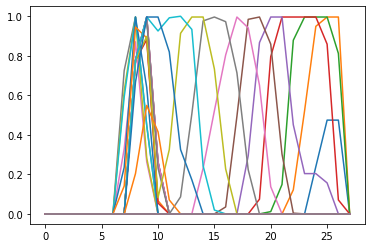

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(X_test[0][:,:,0])
print(np.argmax(Y_test[0]))
print(np.argmax(cnn.predict(X_test[[0]])))